# Introduction de la dataSet

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('user_exo_50K.csv')

In [0]:
data.head()

,yob,domain,firstname,zipcode,gender
0,1985,@wanadoo.fr,b08253b305fb5ec,94450.0,F
1,1961,@sfr.fr,7ff135854376850,78580.0,M
2,1977,@free.fr,172522ec1028ab7,62640.0,NaN
3,-1,@hotmail.com,d3ca5dde60f88db,94100.0,M
4,-1,@gmail.com,bdaae16837dd576,78100.0,NaN


# 1- Cleaning the data

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
yob          50000 non-null int64
domain       50000 non-null object
firstname    50000 non-null object
zipcode      49947 non-null float64
gender       29921 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


Il y a deux type int et float, 'yob' et 'zipcode', 'yob' qui signifie 'year of birth' alors il a -1 comme minimum, donc c'est une valeur manquante cachée. Deuxième chose, il y a des valeurs manquantes au sein du colonne zipcode, 49947/50000

In [0]:
data.describe()

,yob,zipcode
count,50000.00000,49947.000000
mean,1182.04020,56499.602318
std,966.00637,27703.816576
min,-1.00000,1000.000000
25%,-1.00000,33370.000000
50%,1961.00000,60700.000000
75%,1975.00000,78230.000000
max,1999.00000,97490.000000


Le chiffre -1 a 40% de dataSet, c'est énorme

In [0]:
len(data.yob[data.yob == -1]) /data.shape[0] *100

40.0

On le rend Nan

In [0]:
data.yob[data.yob == -1] = np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


On fait un profile de dataSet global, on utilisant pandas-profiling

In [0]:
from pandas_profiling import ProfileReport
ProfileReport(data)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,5
Number of observations,50000
Total Missing (%),16.1%
Total size in memory,1.9 MiB
Average record size in memory,40.0 B
Numeric,2
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


On voit s'il y a une relation entre les valeurs manquantes de *yob* et le zipcode

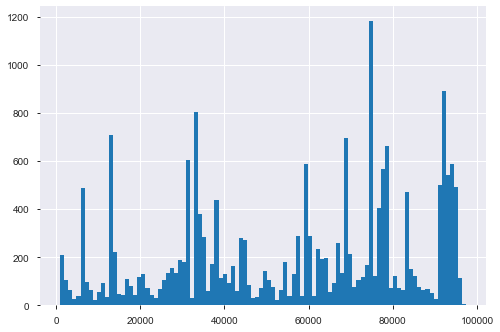

In [0]:
data[data.yob.isna()].zipcode.hist(bins = 100)

la même chose avec la colonne *domain*

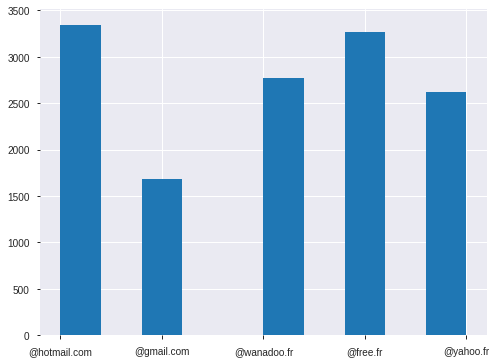

In [0]:
%matplotlib inline
data.domain[data.yob.isna()][data.domain.isin(['@hotmail.com','@free.fr','@wanadoo.fr','@yahoo.fr','@gmail.com'])].hist(figsize=(8,6))

In [0]:
data.domain[data.yob.notna()][data.domain.isin(['@hotmail.com','@free.fr','@wanadoo.fr','@yahoo.fr','@gmail.com'])].hist(color='r', figsize(8,6))

SyntaxError: ignored

Les résultats ne disent rien de plus pour faire la correlation entre les valeurs manquantes, on peut dire yob c'est *MCAR*

Même on utilisant la librairie "missingno" pour voir les relations entre les valeurs manquantes

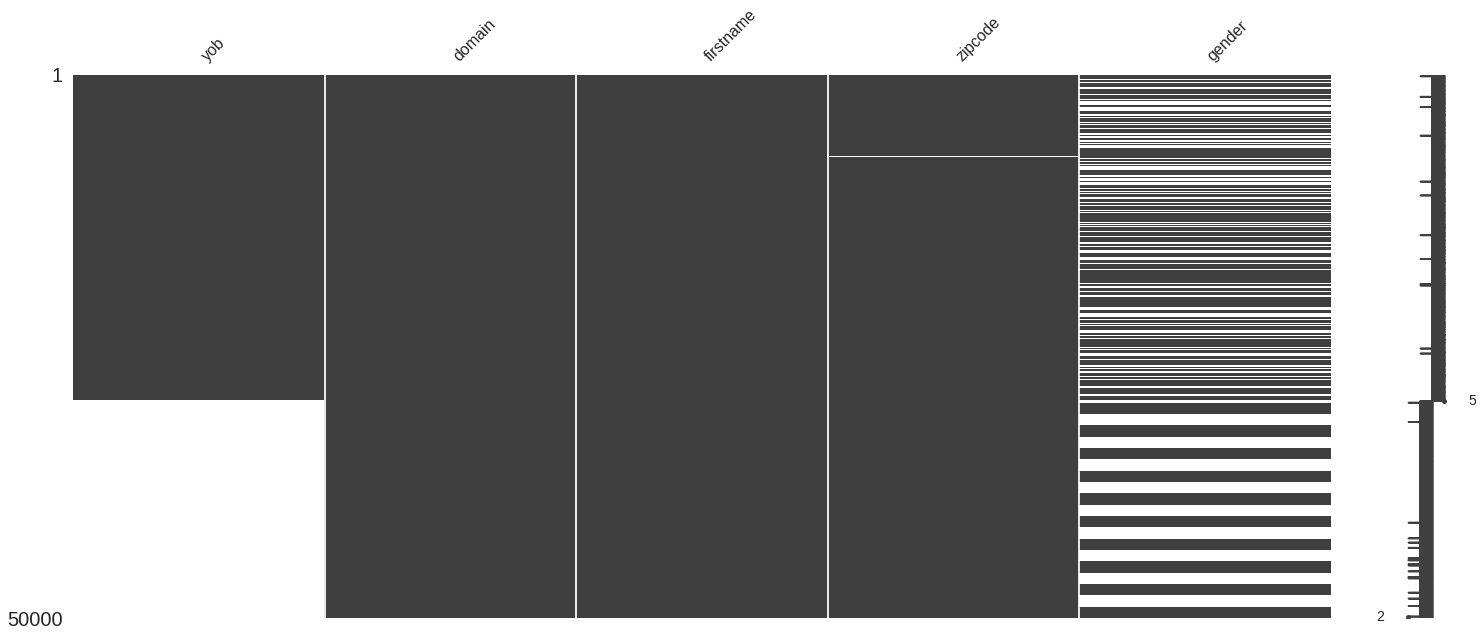

In [0]:
import missingno as msno
msno.matrix(data.sort_values('yob', ascending=True))

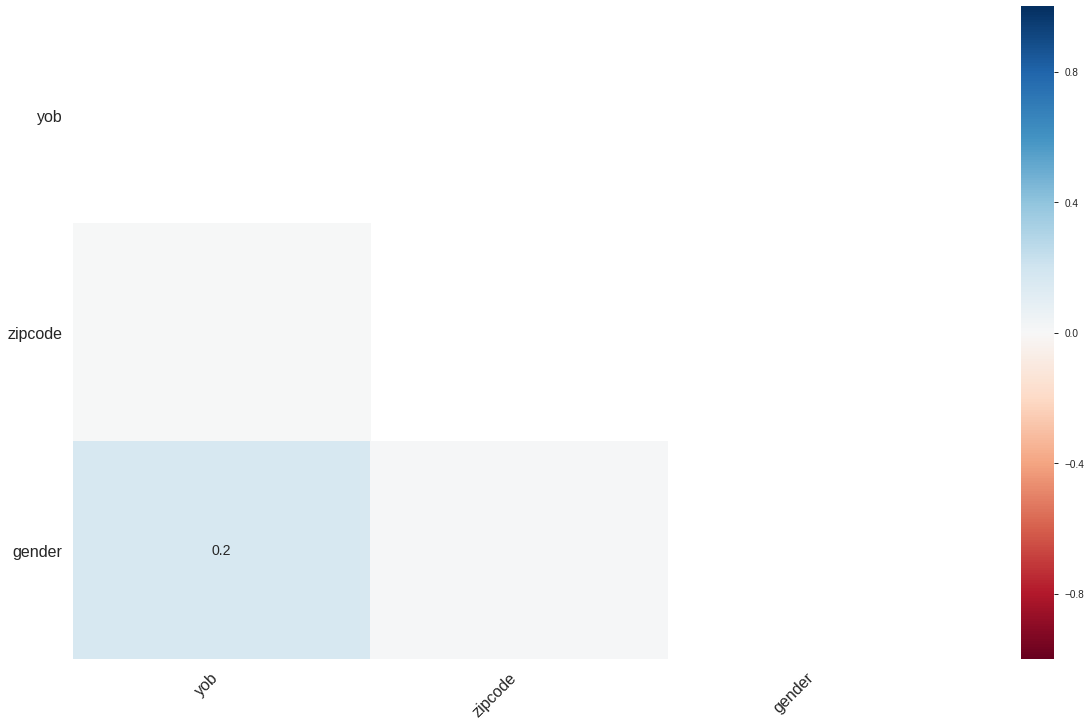

In [0]:
msno.heatmap(data)

In [0]:
yob = data.yob

In [0]:
yob

0        1985.0
1        1961.0
2        1977.0
3           NaN
4           NaN
          ...  
49995    1978.0
49996    1981.0
49997    1959.0
49998       NaN
49999       NaN
Name: yob, Length: 50000, dtype: float64

## Remplissage du yob colonne par méthode ffill 

In [0]:
yob = yob.ffill()

In [0]:
data_ffill = data.copy(deep=True)

In [0]:
data_ffill.yob = list(yob)

In [0]:
ProfileReport(data_ffill)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,5
Number of observations,50000
Total Missing (%),8.1%
Total size in memory,1.9 MiB
Average record size in memory,40.0 B
Numeric,2
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


On remarquant les données sont un petit peu équilibré


In [0]:
data_ffill.yob.value_counts()

1977.0    2308
1980.0    2297
1978.0    2268
1979.0    2236
1976.0    2218
          ... 
1998.0       4
1999.0       3
1922.0       3
1923.0       2
1924.0       1
Name: yob, Length: 83, dtype: int64

In [0]:
from collections import Counter
Counter(data_ffill.yob)

Counter({1900.0: 342,
         1901.0: 24,
         1902.0: 55,
         1910.0: 20,
         1911.0: 10,
         1920.0: 17,
         1922.0: 3,
         1923.0: 2,
         1924.0: 1,
         1926.0: 5,
         1927.0: 6,
         1928.0: 5,
         1929.0: 6,
         1930.0: 24,
         1931.0: 19,
         1932.0: 12,
         1933.0: 18,
         1934.0: 10,
         1935.0: 18,
         1936.0: 29,
         1937.0: 36,
         1938.0: 39,
         1939.0: 57,
         1940.0: 83,
         1941.0: 75,
         1942.0: 113,
         1943.0: 112,
         1944.0: 177,
         1945.0: 174,
         1946.0: 251,
         1947.0: 290,
         1948.0: 292,
         1949.0: 379,
         1950.0: 354,
         1951.0: 336,
         1952.0: 337,
         1953.0: 397,
         1954.0: 464,
         1955.0: 506,
         1956.0: 532,
         1957.0: 546,
         1958.0: 622,
         1959.0: 745,
         1960.0: 732,
         1961.0: 736,
         1962.0: 866,
         1963.0: 83

In [0]:
data_ffill.firstname

0        b08253b305fb5ec
1        7ff135854376850
2        172522ec1028ab7
3        d3ca5dde60f88db
4        bdaae16837dd576
              ...       
49995    b13ba37149fb4ef
49996    634999eeb85d5a3
49997    9a6663f1bf0c560
49998    c2ed8ad5e0de9fe
49999    f80c211bf2b7e74
Name: firstname, Length: 50000, dtype: object

On remarquant firstname est encrypté en forme hexadécimale, la chose qu'on puisse faire est de le rendre en décimale

In [0]:
data_ffill.firstname = data_ffill.firstname.apply(lambda x: int(x,16))

In [0]:
len(data_ffill.zipcode[data_ffill.zipcode.isna()])

53

Il y a juste 53 valeurs manquantes dans la colonne "zipcode" alors c'est va pas nous gêne notre data s'il on le supprimant directement


In [0]:
data_ffill.dropna(subset = ['zipcode'], how='all', inplace=True)

In [0]:
data_ffill.describe()

,yob,firstname,zipcode
count,49947.000000,4.994700e+04,49947.000000
mean,1970.757563,5.915585e+17,56499.602318
std,12.431625,3.392627e+17,27703.816576
min,1900.000000,6.706014e+14,1000.000000
25%,1965.000000,2.876008e+17,33370.000000
50%,1973.000000,5.962937e+17,60700.000000
75%,1979.000000,9.035290e+17,78230.000000
max,1999.000000,1.152811e+18,97490.000000


In [0]:
data.domain.unique()

array(['@wanadoo.fr', '@sfr.fr', '@free.fr', '@hotmail.com', '@gmail.com',
       '@live.fr', '@yahoo.fr', '@yahoo.com', '@orange.fr',
       '@club-internet.fr', '@aol.com', '@hotmail.fr', '@libertysurf.fr',
       '@aliceadsl.fr', '@laposte.net', '@ebuyclub.com', '@voila.fr',
       '@noos.fr', '@numericable.fr', '@me.com', '@dbmail.com',
       '@bbox.fr', '@neuf.fr', '@9online.fr', '@cegetel.net', '@msn.com',
       '@netcourrier.com', '@ymail.com', '@nordnet.fr', '@outlook.fr',
       '@gmx.fr', '@gmx.com', '@outlook.com', '@bluewin.ch', '@aol.fr',
       '@icloud.com', '@live.com', '@live.be', '@gmail.fr', '@skynet.be',
       '@mail.ru'], dtype=object)

*Il y a 47 types de domaine, on choisit d'utiliser le one-hot encoding pour séparer le colonne du 'domain' on 47 colonnes chacun associer à valeur unique*

In [0]:
data_ffill = pd.get_dummies(data_ffill, columns=['domain'])

#2- Dealing with missing data of gender




Preprocessing

In [0]:
# Rendre colonne 'gender' on valeur [1, 0, nan]
from sklearn.preprocessing import OrdinalEncoder

#Création d'encodation ordinaire
gender_ord_enc = OrdinalEncoder()

# sélectionner les données non-nulles 
gender = data_ffill['gender']
gender_not_null = gender[gender.notnull()]

# rendre les valeurs non-nulles en matrix pour être processer par la fonction fit_transform
reshaped_vals = gender_not_null.values.reshape(-1, 1)

# encodage des valeurs non nulles
encoded_vals = gender_ord_enc.fit_transform(reshaped_vals)

# mélanger les données nulles et non-nulles encodées dans notre dataSet
data_ffill.loc[gender.notnull(), 'gender'] = np.squeeze(encoded_vals)

##1.3. KNN imputation

In [0]:
''' Quand j'ai testé l'imputation KNN j'ai remarqué que l'algorithme consomme plus d'énergie et de temps pour l'implimenter, 
et puisque on a limite d'utilisation d'infrastracture RAM ici dans colab, 
je vais sépparer le dataset en morceaux''' 

'''utilisation librairie fancyimpute
voir documentation https://github.com/iskandr/fancyimpute'''

from fancyimpute import KNN

data_KNN_imputed_full = data_ffill.head(0)
for i in range(0,51):
    
    data_KNN_imputed = data_ffill.iloc[i*1000:1000+i*1000,].copy(deep=True)
    # Create KNN imputer
    KNN_imputer = KNN(k = 3)
    data_KNN_imputed.iloc[:, :] = np.round(KNN_imputer.fit_transform(data_KNN_imputed))

    # Reshape the data
    reshaped = data_KNN_imputed['gender'].values.reshape(-1, 1)

    # Perform inverse transform of the ordinally encoded columns
    data_KNN_imputed['gender'] = gender_ord_enc.inverse_transform(reshaped)
    data_KNN_imputed_full = pd.concat([data_KNN_imputed_full, data_KNN_imputed], ignore_index=True)


Imputing row 1/1000 with 0 missing, elapsed time: 0.278
Imputing row 101/1000 with 0 missing, elapsed time: 0.281
Imputing row 201/1000 with 0 missing, elapsed time: 0.283
Imputing row 301/1000 with 0 missing, elapsed time: 0.284
Imputing row 401/1000 with 0 missing, elapsed time: 0.286
Imputing row 501/1000 with 1 missing, elapsed time: 0.287
Imputing row 601/1000 with 1 missing, elapsed time: 0.288
Imputing row 701/1000 with 1 missing, elapsed time: 0.290
Imputing row 801/1000 with 1 missing, elapsed time: 0.291
Imputing row 901/1000 with 1 missing, elapsed time: 0.293
Imputing row 1/1000 with 1 missing, elapsed time: 0.281
Imputing row 101/1000 with 1 missing, elapsed time: 0.283
Imputing row 201/1000 with 1 missing, elapsed time: 0.285
Imputing row 301/1000 with 1 missing, elapsed time: 0.286
Imputing row 401/1000 with 1 missing, elapsed time: 0.287
Imputing row 501/1000 with 1 missing, elapsed time: 0.289
Imputing row 601/1000 with 1 missing, elapsed time: 0.290
Imputing row 701/1

ValueError: ignored

In [0]:
data_KNN_imputed_full.gender.value_counts()

M    36562
F    13385
Name: gender, dtype: int64

## 2.2. MICE imputation

In [0]:
from fancyimpute import IterativeImputer

data_mice_imputed = data_ffill.copy(deep= True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer(max_value=1,min_value=0)

# Impute using fit_tranform on data
data_mice_imputed.iloc[:, :] = np.round(mice_imputer.fit_transform(data_mice_imputed))
# Reshape the data
reshaped = data_mice_imputed['gender'].values.reshape(-1, 1)

# Perform inverse transform of the ordinally encoded columns
data_mice_imputed['gender'] = gender_ord_enc.inverse_transform(reshaped)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [0]:
data_mice_imputed.gender.value_counts()

M    31923
F    18024
Name: gender, dtype: int64

## 2.3. Imputation par IterativeSVD

In [0]:
from fancyimpute import IterativeSVD

data_iSVD_imputed = data_ffill.copy(deep= True)

# Initialize IterativeImputer
svd_imputer = IterativeSVD(max_value=1,min_value=0)

# Impute using fit_tranform on data
data_iSVD_imputed.iloc[:, :] = np.round(svd_imputer.fit_transform(data_iSVD_imputed))
# Reshape the data
reshaped = data_iSVD_imputed[['gender','yob']].values.reshape(-1, 1)

# Perform inverse transform of the ordinally encoded columns
data_iSVD_imputed[['gender', 'yob']] = gender_ord_enc.inverse_transform(reshaped)

[IterativeSVD] Iter 1: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 2: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 3: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 4: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 5: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 6: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 7: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 8: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 9: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 10: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 11: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 12: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 13: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 14: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 15: observed MAE=13264054801654572.000000
[IterativeSVD] Iter 16: observed MAE=13264054801654572.000000
[IterativeSVD] It

IndexError: ignored

In [0]:
data_iSVD_imputed.gender.value_counts()

1.0    41633
0.0     8314
Name: gender, dtype: int64

## 2.4. RandomForest Imputation

In [0]:
#!pip install predictive_imputer
from predictive_imputer import predictive_imputer
data_RandomForest_imputed_full = data_ffill.head(0)
for i in range(0,51):
    data_RandomForest_imputed = data_ffill.iloc[i*1000:1000+i*1000,].copy(deep=True)
    # Create KNN imputer
    RF_imputer = predictive_imputer.PredictiveImputer(f_model='RandomForest')
    data_RandomForest_imputed.iloc[:, :] = np.round(RF_imputer.fit(data_RandomForest_imputed).transform(data_RandomForest_imputed))
    data_RandomForest_imputed_full = pd.concat([data_RandomForest_imputed_full, data_RandomForest_imputed], ignore_index=True)


ImportError: ignored

# 3- Classification: 

**on utilise seulement le dataSet par KNN imputation**

In [0]:
data_KNN_imputed_full.gender = data_KNN_imputed_full.gender.apply(lambda x: 0 if x == 'M' else 1)

Pour rendre La classification assez simple en transform tout les yob on seulement 10 catégories

In [0]:
data_KNN_imputed_full.yob = data_KNN_imputed_full.yob.apply(lambda x: x%100//10)

In [0]:
data_KNN_imputed_full.yob.unique()

array([8., 6., 7., 5., 4., 2., 0., 3., 9., 1.])

On a un problème les catégories sont imbalancés, ca sera difficile de les prédire puisque le modèle va ignorer les valeurs qui sont petits

In [0]:
data_KNN_imputed_full.yob.value_counts()

7.0    20603
8.0    11352
6.0    10212
5.0     4834
4.0     1945
0.0      418
3.0      262
9.0      246
2.0       45
1.0       30
Name: yob, dtype: int64

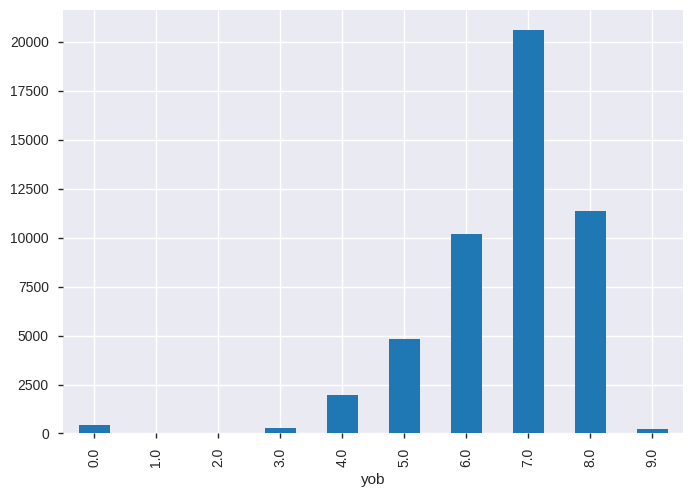

In [0]:
data_KNN_imputed_full.groupby('yob').zipcode.count().plot.bar(ylim = 0)

Si on fait la prédiction par LinearSVC()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics
response = 'yob'
features = [col for col in data_KNN_imputed_full if col != response]

X_train, X_test, y_train, y_test = train_test_split(
    data_KNN_imputed_full[features],
    data_KNN_imputed_full[response],
    test_size=0.2
)

model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vous voyez le score n'est pas bon

In [0]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        89
         1.0       0.00      1.00      0.00         5
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00        57
         4.0       0.00      0.00      0.00       351
         5.0       0.00      0.00      0.00       971
         6.0       0.00      0.00      0.00      1974
         7.0       0.00      0.00      0.00      4152
         8.0       0.00      0.00      0.00      2339
         9.0       0.00      0.00      0.00        44

    accuracy                           0.00      9990
   macro avg       0.00      0.10      0.00      9990
weighted avg       0.00      0.00      0.00      9990



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3-1 Balancé le dataSet on utilisant les algorithms ADASYN ou SMOTE
voir wikipedia: https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis

## 3-2 RandomForest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
response1 = 'yob'
features1 = [col for col in data_KNN_imputed_full.columns if col != response1]
sm = ADASYN()
x_train_res, y_train_res = sm.fit_sample(data_KNN_imputed_full[features1], data_KNN_imputed_full[response1])
x_train, x_val, y_train, y_val = train_test_split(data_KNN_imputed_full[features1], data_KNN_imputed_full[response1],
                                                  test_size = .33,
                                                  random_state=12)

model_rf = RandomForestClassifier(n_estimators=80, random_state=12)
model_rf.fit(x_train_res, y_train_res)
print(metrics.classification_report(y_val,model_rf.predict(x_val)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Func

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       129
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        15
         3.0       0.98      0.98      0.98        93
         4.0       0.99      0.99      0.99       623
         5.0       0.99      0.98      0.99      1609
         6.0       0.99      0.99      0.99      3386
         7.0       0.99      0.99      0.99      6851
         8.0       0.99      0.99      0.99      3681
         9.0       0.98      0.97      0.97        87

    accuracy                           0.99     16483
   macro avg       0.99      0.99      0.99     16483
weighted avg       0.99      0.99      0.99     16483



**Super on a un bon score**

In [0]:
model_rf.predict(x_val.head(1))

array([6.])

On remarque qu'il ya des centaines d'erreurs plus précisement

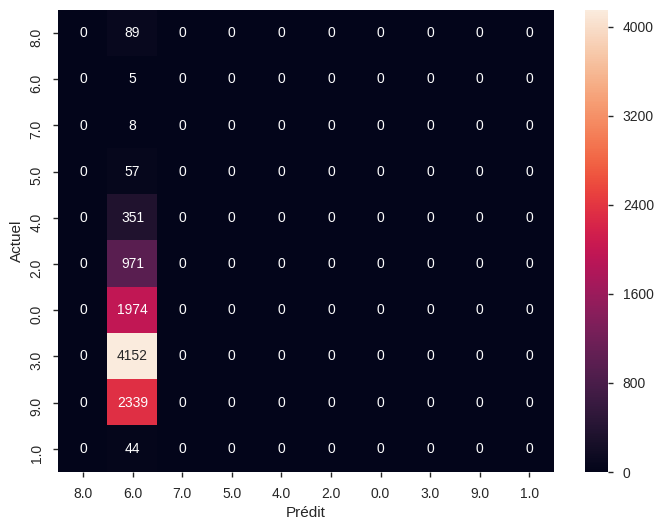

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=data_KNN_imputed_full.yob.unique(), yticklabels=data_KNN_imputed_full.yob.unique())
plt.ylabel('Actuel')
plt.xlabel('Prédit')
plt.show()